#### Merge 12 months of sales data into a single csv file

In [5]:
files =[file for file in os.listdir("E:\Data Science Projects\Sales\Sales Data")]
for file in files:
    print(file)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\Data Science Projects\\Sales\\Sales Data'

In [6]:
path = "E:\Data Science Projects\Sales\Sales Data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

NameError: name 'files' is not defined

### convert it into dataset

In [7]:
all_data.to_csv('E:\Data Science Projects\Sales\Sales Data/all_data.csv',index=False)

OSError: Cannot save file into a non-existent directory: 'E:\Data Science Projects\Sales\Sales Data'

#### Data cleaning and formatting

In [8]:
all_data.dtypes

Series([], dtype: object)

In [9]:
all_data.head()

""


In [10]:
all_data.isnull().sum()

Series([], dtype: float64)

In [11]:
all_data = all_data.dropna(how='all')
all_data.shape

(0, 0)

#### What is the best monthfor sale?

In [12]:
'04/19/19 08:46'.split('/')[0]

'04'

In [13]:
def month(x):
    return x.split('/')[0]

#### add month col

In [14]:
all_data['Month']=all_data['Order Date'].apply(month)

KeyError: 'Order Date'

In [15]:
all_data.dtypes

Series([], dtype: object)

In [16]:
all_data['Month'].unique()

KeyError: 'Month'

In [17]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

KeyError: 'Month'

In [18]:
all_data=all_data[~filter]

TypeError: bad operand type for unary ~: 'type'

In [19]:
all_data.shape

(0, 0)

In [20]:
all_data.head()

""


In [21]:
all_data['Month']=all_data['Month'].astype(int)

KeyError: 'Month'

In [22]:
all_data.dtypes

Series([], dtype: object)

In [23]:
all_data['Price Each']=all_data['Price Each'].astype(float)

KeyError: 'Price Each'

In [24]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

KeyError: 'Quantity Ordered'

In [25]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

KeyError: 'Quantity Ordered'

In [26]:
all_data.groupby('Month')['sales'].sum()

KeyError: 'Month'

In [ ]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Which city has max order

In [27]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [28]:
def city(x):
    return x.split(',')[1]

In [29]:
all_data['city']=all_data['Purchase Address'].apply(city)

KeyError: 'Purchase Address'

In [30]:
all_data.groupby('city')['city'].count()

KeyError: 'city'

#### What time should we display advertisements to maximise for product purchase?

In [32]:
all_data['Order Date'][0].dtype

KeyError: 'Order Date'

In [33]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

KeyError: 'Order Date'

In [34]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

KeyError: 'Hour'

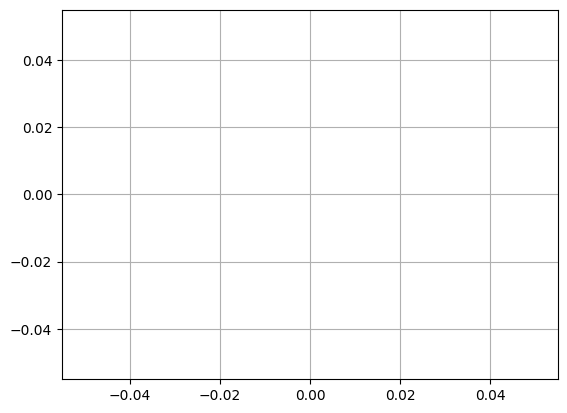

In [35]:
plt.grid()
plt.plot(keys,hour)

#### between 12pm and 7pm is probably the best time to advertise to maximise product purchase

### What product sold the most? & Why?

In [36]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

KeyError: 'Product'

In [37]:
all_data.groupby('Product')['Price Each'].mean()

KeyError: 'Product'

In [38]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

KeyError: 'Product'

In [1]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

NameError: name 'plt' is not defined

#### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa

In [2]:
all_data.shape

NameError: name 'all_data' is not defined

### What products are most often sold together?
note: keep orders that have same order Id,are sold mostly together

In [42]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,7
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,10
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,14


In [3]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

NameError: name 'df' is not defined

In [5]:
df.head()

NameError: name 'df' is not defined

In [45]:
df.shape

(371900, 11)

In [46]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

In [4]:
df2['Grouped'].value_counts()[0:5].plot.pie()

NameError: name 'df2' is not defined

In [49]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [3]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

NameError: name 'go' is not defined

In [2]:
iplot([trace])

NameError: name 'iplot' is not defined